Data saved to: octahedral_3d_multiples_of_18.xlsx
Also saved to: D:\Competetive programming\project\octahedral_3d_multiples_of_18.xlsx


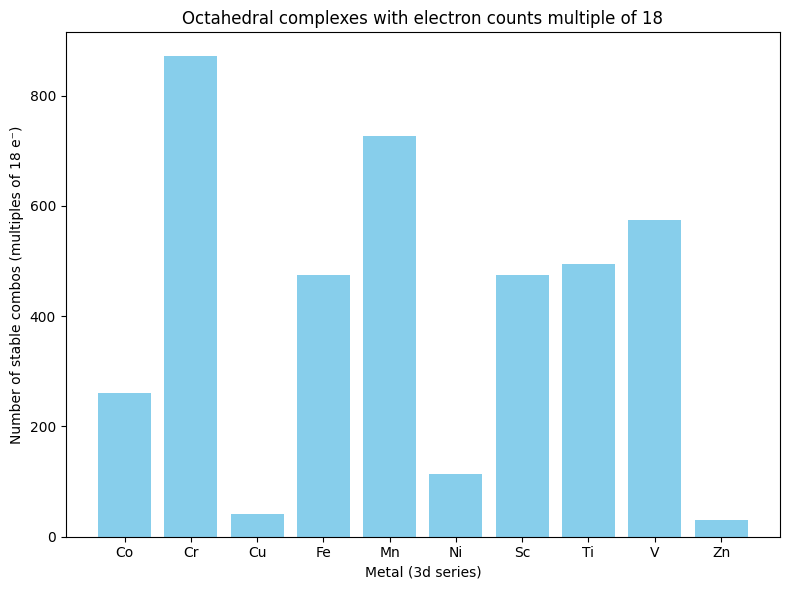

Plot of stable complexes saved to: octahedral_3d_stable_complexes.png


In [2]:
import os
import pandas as pd
from mendeleev import element
from collections import defaultdict, Counter
from itertools import combinations_with_replacement
import matplotlib.pyplot as plt

###################################################
# 1) Reduced Ligand Dictionary (10 ligands total)
###################################################
# All halogens grouped into "Halogen (X)" for simplicity
ligands_18e = {
    "Carbonyl (CO)": 2,
    "Phosphine (PR3)": 2,
    "Amine (NR3)": 2,
    "Halogen (X)": 1,           # covers F, Cl, Br, I
    "Hydride (H-)": 2,          # often considered a 2-electron donor
    "Alkyl (R)": 1,
    "Nitrosyl, linear (NO)": 3, # simplifying to linear NO
    "η⁵-Cyclopentadienyl (C5H5)": 5,
    "Alkene (C=C)": 2,
    "Carbene (CR2)": 2
}

###################################################
# 2) 3d Metals (Sc–Zn)
###################################################
metals_3d = ["Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn"]

###################################################
# 3) Helper Function to Retrieve Group Number
###################################################
def get_group_number(metal_symbol):
    """
    Attempt to retrieve an integer group from Mendeleev's element(...) object.
    Returns int or None if not found.
    """
    el = element(metal_symbol)
    
    # A) el.group is already an integer
    if isinstance(el.group, int):
        return el.group
    
    # B) if el.group is an object with a .number attribute
    if el.group is not None:
        maybe_num = getattr(el.group, "number", None)
        if isinstance(maybe_num, int):
            return maybe_num
    
    # C) if el.group_id is present (could be int or string)
    if hasattr(el, "group_id") and el.group_id is not None:
        gid = el.group_id
        if isinstance(gid, int):
            return gid
        if isinstance(gid, str):
            group_map = {
                "IA": 1, "IIA": 2, "IIIA": 13, "IVA": 14, "VA": 15,
                "VIA": 16, "VIIA": 17, "VIIIA": 18,
                "IB": 11, "IIB": 12, "IIIB": 3, "IVB": 4, "VB": 5,
                "VIB": 6, "VIIB": 7, "VIIIB": 8
            }
            gid_strip = gid.strip()
            if gid_strip in group_map:
                return group_map[gid_strip]
            # possibly an integer or Roman numeral
            try:
                return int(gid_strip)
            except ValueError:
                pass
    
    return None

###################################################
# 4) Brute-Force Octahedral Check (6 ligands)
###################################################
desired_coordination = 6   # octahedral
grouped_results = defaultdict(list)

for metal in metals_3d:
    group_num = get_group_number(metal)
    if group_num is None:
        print(f"Skipping {metal} (group not found via Mendeleev).")
        continue
    
    metal_valence_e = group_num  # zero oxidation state assumption
    
    # generate all combinations of 6 ligands (order doesn't matter)
    combos = combinations_with_replacement(ligands_18e.keys(), desired_coordination)
    
    for combo in combos:
        counts = Counter(combo)
        lig_e_total = sum(ligands_18e[l] * cnt for l, cnt in counts.items())
        total_e = metal_valence_e + lig_e_total
        
        # Check if total_e is a positive multiple of 18 (i.e. 18, 36, 54, etc.)
        if total_e > 0 and total_e % 18 == 0:
            lig_str = ", ".join(f"{lig} x {cnt}" for lig, cnt in sorted(counts.items()))
            grouped_results[group_num].append({
                "Metal": metal,
                "Group #": group_num,
                "Ligand Combination": lig_str,
                "Total Electron Count": total_e
            })

###################################################
# 5) Write One Excel File with Multiple Sheets
#    - Each group gets its own sheet
###################################################
excel_filename = "octahedral_3d_multiples_of_18.xlsx"
with pd.ExcelWriter(excel_filename, engine="openpyxl") as writer:
    for gnum in sorted(grouped_results.keys()):
        row_dicts = grouped_results[gnum]
        if not row_dicts:
            continue
        df_group = pd.DataFrame(row_dicts)
        sheet_name = f"Group {gnum}"
        df_group.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Data saved to: {excel_filename}")

# Also save to a specified directory if desired
save_dir = r"D:\Competetive programming\project"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
excel_path = os.path.join(save_dir, excel_filename)
with pd.ExcelWriter(excel_path, engine="openpyxl") as writer:
    for gnum in sorted(grouped_results.keys()):
        row_dicts = grouped_results[gnum]
        if not row_dicts:
            continue
        df_group = pd.DataFrame(row_dicts)
        sheet_name = f"Group {gnum}"
        df_group.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Also saved to: {excel_path}")

###################################################
# 6) Visualization of the Stable Complexes Found
###################################################
# Combine all stable complexes into a single DataFrame
all_stable = []
for gnum, rows in grouped_results.items():
    all_stable.extend(rows)

df_all = pd.DataFrame(all_stable)

if df_all.empty:
    print("No stable octahedral complexes found. No plot to generate.")
else:
    # Count how many combos each metal has
    metal_counts = df_all["Metal"].value_counts().sort_index()
    
    # Plot a bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(metal_counts.index, metal_counts.values, color="skyblue")
    
    plt.xlabel("Metal (3d series)")
    plt.ylabel("Number of stable combos (multiples of 18 e⁻)")
    plt.title("Octahedral complexes with electron counts multiple of 18")
    plt.tight_layout()
    
    plot_filename = "octahedral_3d_stable_complexes.png"
    plt.savefig(plot_filename, dpi=150)
    plt.show()
    
    print(f"Plot of stable complexes saved to: {plot_filename}")


Data saved to Excel file: tetrahedral_18e_3d_by_group.xlsx
Data also saved to: D:\Competetive programming\project\tetrahedral_18e_3d_by_group.xlsx


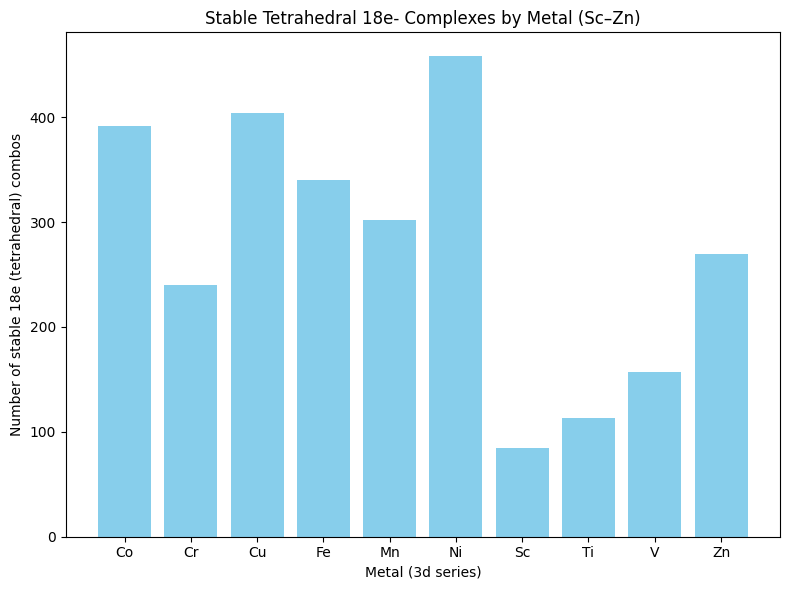

Plot saved to tetrahedral_18e_3d_stable_complexes.png


In [3]:
import os
import pandas as pd
from mendeleev import element
from collections import Counter, defaultdict
from itertools import combinations_with_replacement

##########################################
# 1) Reduced Ligand Dictionary (15 ligands)
##########################################
ligands_18e = {
    "Carbonyl (CO)": 2,
    "Phosphine (PR3)": 2,
    "Amine (NR3)": 2,
    "Alkene (C=C)": 2,
    "Nitrosyl, linear (N≡O)": 3,
    "Halogen (X)": 1,  # All halides combined
    "Hydride (H)": 1,
    "Alkyl (R)": 1,
    "Aryl (Ph)": 1,
    "Alkoxide (OR)": 2,
    "Carbene (CR2)": 2,
    "Carbyne (CR)": 3,
    "η³-Allyl (C3H5)": 3,
    "η⁵-Cyclopentadienyl (C5H5)": 5,
    "η⁶-Benzene (C6H6)": 6
}

##########################################
# 2) First-row transition metals (Sc–Zn)
##########################################
metals_3d = ["Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn"]

##########################################
# 3) Helper: get integer group from Mendeleev
##########################################
def get_group_number(metal_symbol):
    """
    Attempt to get an integer group from Mendeleev's element(...) object.
    Tries multiple possibilities:
      - el.group if it's an int
      - el.group.number if .group is an object
      - el.group_id (could be int or str)
    Returns an integer or None if all fails.
    """
    el = element(metal_symbol)
    
    # A) If el.group is directly an integer
    if isinstance(el.group, int):
        return el.group
    
    # B) If el.group is an object with .number
    if el.group is not None:
        maybe_num = getattr(el.group, "number", None)
        if isinstance(maybe_num, int):
            return maybe_num
    
    # C) If el.group_id is set
    if hasattr(el, "group_id") and el.group_id is not None:
        gid = el.group_id
        # If it's an integer
        if isinstance(gid, int):
            return gid
        # If it's a string (e.g. "VIB")
        if isinstance(gid, str):
            group_map = {
                "IA": 1, "IIA": 2, "IIIA": 13, "IVA": 14, "VA": 15,
                "VIA": 16, "VIIA": 17, "VIIIA": 18,
                "IB": 11, "IIB": 12, "IIIB": 3, "IVB": 4, "VB": 5,
                "VIB": 6, "VIIB": 7, "VIIIB": 8
            }
            gid_strip = gid.strip()
            if gid_strip in group_map:
                return group_map[gid_strip]
            
            # Possibly a plain integer or roman numeral
            try:
                return int(gid_strip)
            except ValueError:
                pass
    
    return None

##########################################
# 4) Brute Force Tetrahedral (4-ligand) 18e- Check
##########################################
desired_electrons = 18
coord_number = 4  # tetrahedral

from itertools import combinations_with_replacement
from collections import defaultdict, Counter

grouped_results = defaultdict(list)

for metal in metals_3d:
    group_num = get_group_number(metal)
    if group_num is None:
        print(f"Skipping {metal}: cannot retrieve integer group from Mendeleev.")
        continue
    
    # Metal valence electrons (zero oxidation state assumption)
    metal_electrons = group_num
    
    # Generate all 4-ligand combos
    combos = combinations_with_replacement(ligands_18e.keys(), coord_number)
    
    for combo in combos:
        counts = Counter(combo)
        
        # Sum the donation from these ligands
        total_ligand_e = sum(ligands_18e[l] * c for l, c in counts.items())
        total_e = metal_electrons + total_ligand_e
        
        if total_e == desired_electrons:
            # Create a representation like "Carbonyl (CO) x 2, Halogen (X) x 2"
            lig_str = ", ".join(f"{lig} x {cnt}" for lig, cnt in sorted(counts.items()))
            grouped_results[group_num].append({
                "Metal": metal,
                "Group #": group_num,
                "Ligand Combination": lig_str,
                "Total Electron Count": total_e
            })

##########################################
# 5) Write to Excel with a sheet per group
##########################################
excel_filename = "tetrahedral_18e_3d_by_group.xlsx"
with pd.ExcelWriter(excel_filename, engine="openpyxl") as writer:
    # Sort the group numbers in ascending order
    for gnum in sorted(grouped_results.keys()):
        row_dicts = grouped_results[gnum]
        if not row_dicts:
            continue
        df_group = pd.DataFrame(row_dicts)
        sheet_name = f"Group {gnum}"
        df_group.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Data saved to Excel file: {excel_filename}")

# Also save to a custom directory if desired
save_dir = r"D:\Competetive programming\project"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
excel_path = os.path.join(save_dir, excel_filename)
with pd.ExcelWriter(excel_path, engine="openpyxl") as writer:
    for gnum in sorted(grouped_results.keys()):
        row_dicts = grouped_results[gnum]
        if not row_dicts:
            continue
        df_group = pd.DataFrame(row_dicts)
        sheet_name = f"Group {gnum}"
        df_group.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Data also saved to: {excel_path}")

##########################################
# 6) Make a Plot of Stable Complexes Found
##########################################
# Combine all stable complexes from all groups into a single DataFrame
all_rows = []
for g, dict_list in grouped_results.items():
    all_rows.extend(dict_list)

df_all = pd.DataFrame(all_rows)

if df_all.empty:
    print("No stable tetrahedral 18-electron complexes found. No plot generated.")
else:
    import matplotlib.pyplot as plt
    
    # Count how many combos each metal has
    metal_counts = df_all["Metal"].value_counts().sort_index()
    
    # Create a bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(metal_counts.index, metal_counts.values, color="skyblue")
    
    plt.xlabel("Metal (3d series)")
    plt.ylabel("Number of stable 18e (tetrahedral) combos")
    plt.title("Stable Tetrahedral 18e- Complexes by Metal (Sc–Zn)")
    plt.tight_layout()
    
    # Save the plot
    plot_filename = "tetrahedral_18e_3d_stable_complexes.png"
    plt.savefig(plot_filename, dpi=150)
    plt.show()
    
    print(f"Plot saved to {plot_filename}")
